In [ ]:
# seoul_weather.csv
# 8월의 최고기온을 추출해서 라인그래프로 그리시오
# 매년 8월 중에 최고기온 하나를 뽑아서 라인 차트로 그리시오 
# 지구온난화 여부확인을 위해 매년 평균기온의 line차트를 그리시오
# 1~12월 사이 각 월의 일평균기온의 bax chart를 그리시오


In [ ]:
# 01. CCTV_in_Seoul.csv
# CCTV 수를 기준으로 구를 정렬하시오
# 2016년도에 cctv 수 증가율이 높은 상위 5개 구 출력
# 인구당 cctv 수가 가장 높은 구 상위 5개 출력
# 인구수, 외국인비율, 고령자 비율 중에서 인구당 cctv 수에 가장 큰 영향을 미치는 요소는 무엇인가


In [ ]:
# data_study/subwaytime.csv
# 출근시간에 승차인원이 가장 많은 역과 하차인원이 가장 많은 역을 출력하시오? ( 7시 ~ 9시)
# 전체 시간에서 승차 인원이 가장 많은 역은?
# 퇴근 시간에 하차인원이 가장 많은 역.. (pm 7:00 ~ 10:00)
# 신림역의 퇴근시간 이용자 수?

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [4]:
# seoul_weather.csv
tt = pd.read_csv('./data_study/seoul_weather.csv', encoding='cp949', skiprows=11)
tt = pd.DataFrame(tt)

In [6]:
tt.head(3)

,\t\t지점번호,지점명,일시,평균기온(℃),최고기온(℃),\t최고기온시각,최저기온(℃),최저기온시각
0,108,서울,1907-10-01,13.5,20.7,NaN,7.9,NaN
1,108,서울,1907-10-02,16.2,22.0,NaN,7.9,NaN
2,108,서울,1907-10-03,16.2,21.3,NaN,13.1,NaN


In [13]:
tt.drop(['\t최고기온시각','최저기온시각'], axis=1, inplace=True)
tt.head(3)

,\t\t지점번호,지점명,일시,평균기온(℃),최고기온(℃),최저기온(℃)
0,108,서울,1907-10-01,13.5,20.7,7.9
1,108,서울,1907-10-02,16.2,22.0,7.9
2,108,서울,1907-10-03,16.2,21.3,13.1


In [14]:
tt.columns='지점번호','지점명','일시','평온','고온','저온'
tt.head(3)

,지점번호,지점명,일시,평온,고온,저온
0,108,서울,1907-10-01,13.5,20.7,7.9
1,108,서울,1907-10-02,16.2,22.0,7.9
2,108,서울,1907-10-03,16.2,21.3,13.1


In [16]:
tt.drop('지점번호', axis=1, inplace=True)

In [17]:
tt.head(3)

,지점명,일시,평온,고온,저온
0,서울,1907-10-01,13.5,20.7,7.9
1,서울,1907-10-02,16.2,22.0,7.9
2,서울,1907-10-03,16.2,21.3,13.1


In [18]:
tt['일시']=pd.to_datetime(tt['일시'])
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40488 entries, 0 to 40487
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   지점명     40488 non-null  object        
 1   일시      40488 non-null  datetime64[ns]
 2   평온      39732 non-null  float64       
 3   고온      39730 non-null  float64       
 4   저온      39731 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 1.5+ MB


In [21]:
tt['일시'].dt.day

0         1
1         2
2         3
3         4
4         5
         ..
40483     7
40484     8
40485     9
40486    10
40487    11
Name: 일시, Length: 40488, dtype: int64

<AxesSubplot:>

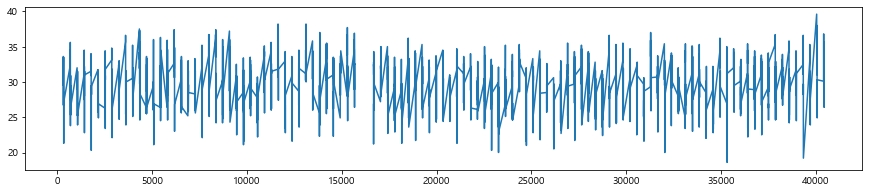

In [32]:
# 8월의 최고기온을 추출해서 라인그래프로 그리시오
tt[tt['일시'].dt.month==8]['고온'].plot(figsize=(15,3))

<AxesSubplot:ylabel='Frequency'>

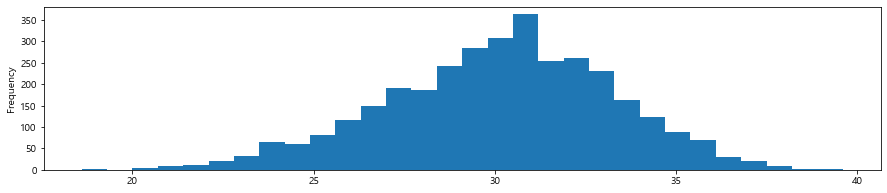

In [33]:
tt[tt['일시'].dt.month==8]['고온'].plot(kind='hist', bins=30, figsize=(15,3))

In [34]:
# 매년 8월 중에 최고기온 하나를 뽑아서 라인 차트로 그리시오 
tt['year'] = tt['일시'].dt.year
tt.head(3)

,지점명,일시,평온,고온,저온,year
0,서울,1907-10-01,13.5,20.7,7.9,1907
1,서울,1907-10-02,16.2,22.0,7.9,1907
2,서울,1907-10-03,16.2,21.3,13.1,1907


<AxesSubplot:xlabel='year'>

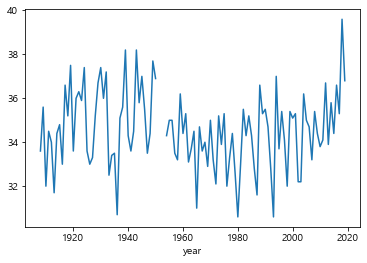

In [38]:
tt[tt['일시'].dt.month==8].groupby('year')['고온'].max().plot()

<AxesSubplot:xlabel='year'>

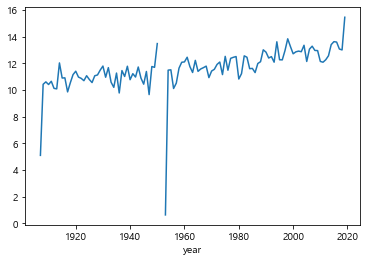

In [43]:
# 지구온난화 여부확인을 위해 매년 평균기온의 line차트를 그리시오
tt.groupby('year')['평온'].mean().plot()

In [44]:
# 1~12월 사이 각 월의 일평균기온의 bax chart를 그리시오
tt['month']= tt['일시'].dt.month

In [45]:
tt.head(3)

,지점명,일시,평온,고온,저온,year,month
0,서울,1907-10-01,13.5,20.7,7.9,1907,10
1,서울,1907-10-02,16.2,22.0,7.9,1907,10
2,서울,1907-10-03,16.2,21.3,13.1,1907,10


<AxesSubplot:xlabel='month'>

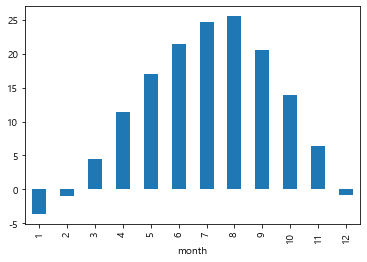

In [49]:
tt.groupby('month')['평온'].mean().plot(kind='bar')

In [51]:
# 01. CCTV_in_Seoul.csv
ff=pd.read_csv('./data_study/CCTV_in_Seoul.csv')
ff=pd.DataFrame(ff)
ff.head(3)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204


In [62]:
# CCTV 수를 기준으로 구를 정렬하시오
ff.sort_values('소계', ascending=False)['기관명']

0      강남구
18     양천구
14     서초구
21     은평구
20     용산구
6      구로구
4      관악구
16     성북구
10    동대문구
8      노원구
11     동작구
15     성동구
7      금천구
22     종로구
13    서대문구
19    영등포구
3      강서구
1      강동구
2      강북구
5      광진구
23      중구
24     중랑구
17     송파구
12     마포구
9      도봉구
Name: 기관명, dtype: object

In [80]:
# 2016년도에 cctv 수 증가율이 높은 상위 5개 구 출력
ff['증가율'] = ff['2016년']-ff['2015년']

In [87]:
ff.sort_values('증가율', ascending=False)['기관명'].head(5).values

array(['양천구', '종로구', '송파구', '동대문구', '강남구'], dtype=object)

In [88]:
pop = pd.read_excel('./data_study/01. population_in_seoul.xls', header=2, usecols = [1,3,6,9,13])
pop.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [90]:
pop.columns='자치구','인구수','한국인','외국인','고령자'

In [96]:
# 인구당 cctv 수가 가장 높은 구 상위 5개 출력
# tt = pd.merge(tt,pop, left_on= '기관명', right_on='자치구')
ff = pd.merge(ff,pop, left_on= '기관명', right_on='자치구')
ff.head(3)

,기관명,소계,2013년도 이전,2014년,2015년,2016년,증가율,자치구,인구수,한국인,외국인,고령자
0,강남구,2780,1292,430,584,932,348,강남구,570500.0,565550.0,4950.0,63167.0
1,강동구,773,379,99,155,377,222,강동구,453233.0,449019.0,4214.0,54622.0
2,강북구,748,369,120,138,204,66,강북구,330192.0,326686.0,3506.0,54813.0


In [97]:
ff['인구비례']=ff['소계']/ff['인구수']
ff.head(3)

,기관명,소계,2013년도 이전,2014년,2015년,2016년,증가율,자치구,인구수,한국인,외국인,고령자,인구비례
0,강남구,2780,1292,430,584,932,348,강남구,570500.0,565550.0,4950.0,63167.0,0.004873
1,강동구,773,379,99,155,377,222,강동구,453233.0,449019.0,4214.0,54622.0,0.001706
2,강북구,748,369,120,138,204,66,강북구,330192.0,326686.0,3506.0,54813.0,0.002265


In [101]:
ff.sort_values('인구비례', ascending=False)['기관명'].iloc[:5].values

array(['용산구', '종로구', '중구', '강남구', '서초구'], dtype=object)

In [102]:
# 인구수, 외국인비율, 고령자 비율 중에서 인구당 cctv 수에 가장 큰 영향을 미치는 요소는 무엇인가
ff_a = pd.DataFrame()

In [105]:
ff_a = ff[['기관명','인구수','외국인','고령자','인구비례']]
ff_a.head()

,기관명,인구수,외국인,고령자,인구비례
0,강남구,570500.0,4950.0,63167.0,0.004873
1,강동구,453233.0,4214.0,54622.0,0.001706
2,강북구,330192.0,3506.0,54813.0,0.002265
3,강서구,603772.0,6524.0,72548.0,0.001464
4,관악구,525515.0,18312.0,68082.0,0.002847


<AxesSubplot:>

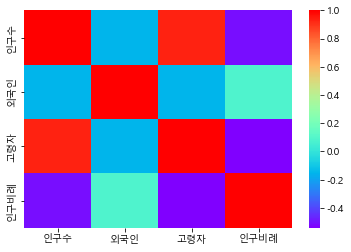

In [110]:
sns.heatmap(ff_a.corr(), cmap=plt.cm.rainbow)

In [111]:
ff_a.corr()

,인구수,외국인,고령자,인구비례
인구수,1.000000,-0.153371,0.932667,-0.514143
외국인,-0.153371,1.000000,-0.155381,0.079211
고령자,0.932667,-0.155381,1.000000,-0.541024
인구비례,-0.514143,0.079211,-0.541024,1.000000


In [113]:
# data_study/subwaytime.csv
dd=pd.read_csv('./data_study/subwaytime.csv', encoding='cp949')
dd=pd.DataFrame(dd)

In [114]:
dd.head(3)

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,23:00:00~23:59:59,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
1,2019-01,1호선,150.0,서울역,927,22,10682,8774,13504,45545,...,33149,19442,3612,7167,0,410,0,0,0,0
2,2019-01,1호선,151.0,시청,74,0,2409,4049,3532,19241,...,14478,4079,981,1256,3,29,0,0,0,0


In [118]:
dd.drop(['사용월','호선명','역ID'], axis=1, inplace=True)
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   지하철역               598 non-null    object
 1   04:00:00~04:59:59  599 non-null    object
 2   Unnamed: 5         599 non-null    object
 3   05:00:00~05:59:59  599 non-null    object
 4   Unnamed: 7         599 non-null    object
 5   06:00:00~06:59:59  599 non-null    object
 6   Unnamed: 9         599 non-null    object
 7   07:00:00~07:59:59  599 non-null    object
 8   Unnamed: 11        599 non-null    object
 9   08:00:00~08:59:59  599 non-null    object
 10  Unnamed: 13        599 non-null    object
 11  09:00:00~09:59:59  599 non-null    object
 12  Unnamed: 15        599 non-null    object
 13  10:00:00~10:59:59  599 non-null    object
 14  Unnamed: 17        599 non-null    object
 15  11:00:00~11:59:59  599 non-null    object
 16  Unnamed: 19        599 non-null    object
 1

In [122]:
dd.drop(0, axis=0, inplace=True)

In [123]:
dd.head(3)

,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,07:00:00~07:59:59,Unnamed: 11,08:00:00~08:59:59,...,23:00:00~23:59:59,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51
1,서울역,927,22,10682,8774,13504,45545,39110,103863,80492,...,33149,19442,3612,7167,0,410,0,0,0,0
2,시청,74,0,2409,4049,3532,19241,7703,66876,9978,...,14478,4079,981,1256,3,29,0,0,0,0
3,종각,100,8,4409,5105,4593,26969,6733,104259,11028,...,54264,5560,4886,1722,0,0,0,0,0,0


In [143]:
li=[]
a=4
for i in range(1,25):
    li.append(str(a)+'승')
    li.append(str(a)+'하')
    a = int(a)
    a+=1
print(li)

['4승', '4하', '5승', '5하', '6승', '6하', '7승', '7하', '8승', '8하', '9승', '9하', '10승', '10하', '11승', '11하', '12승', '12하', '13승', '13하', '14승', '14하', '15승', '15하', '16승', '16하', '17승', '17하', '18승', '18하', '19승', '19하', '20승', '20하', '21승', '21하', '22승', '22하', '23승', '23하', '24승', '24하', '25승', '25하', '26승', '26하', '27승', '27하']


In [149]:
dd.columns=['지하철역']+li

In [150]:
dd.head()

,지하철역,4승,4하,5승,5하,6승,6하,7승,7하,8승,...,23승,23하,24승,24하,25승,25하,26승,26하,27승,27하
1,서울역,927,22,10682,8774,13504,45545,39110,103863,80492,...,33149,19442,3612,7167,0,410,0,0,0,0
2,시청,74,0,2409,4049,3532,19241,7703,66876,9978,...,14478,4079,981,1256,3,29,0,0,0,0
3,종각,100,8,4409,5105,4593,26969,6733,104259,11028,...,54264,5560,4886,1722,0,0,0,0,0,0
4,종로3가,122,4,5061,2520,3876,12832,6066,29381,9735,...,25970,5503,3214,2471,0,52,0,0,0,0
5,종로5가,43,2,1934,3590,2935,14991,5143,40376,8509,...,12013,3450,785,980,1,3,0,0,0,0


In [166]:
# 출근시간에 승차인원이 가장 많은 역과 하차인원이 가장 많은 역을 출력하시오? ( 7시 ~ 9시)
dd['8하'] = dd['8하'].astype('int')
dd.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 1 to 598
Data columns (total 49 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지하철역    598 non-null    object
 1   4승      598 non-null    object
 2   4하      598 non-null    object
 3   5승      598 non-null    object
 4   5하      598 non-null    object
 5   6승      598 non-null    object
 6   6하      598 non-null    object
 7   7승      598 non-null    int32 
 8   7하      598 non-null    int32 
 9   8승      598 non-null    int32 
 10  8하      598 non-null    int32 
 11  9승      598 non-null    object
 12  9하      598 non-null    object
 13  10승     598 non-null    object
 14  10하     598 non-null    object
 15  11승     598 non-null    object
 16  11하     598 non-null    object
 17  12승     598 non-null    object
 18  12하     598 non-null    object
 19  13승     598 non-null    object
 20  13하     598 non-null    object
 21  14승     598 non-null    object
 22  14하     598 non-null    ob

In [182]:
dd['출_승']=dd['7승']+dd['8승']
dd['출_하']=dd['7하']+dd['8하']
dd.head(2)

,지하철역,4승,4하,5승,5하,6승,6하,7승,7하,8승,...,24승,24하,25승,25하,26승,26하,27승,27하,출_승,출_하
1,서울역,927,22,10682,8774,13504,45545,39110,103863,80492,...,3612,7167,0,410,0,0,0,0,119602,340610
2,시청,74,0,2409,4049,3532,19241,7703,66876,9978,...,981,1256,3,29,0,0,0,0,17681,276225


In [188]:
dd.sort_values('출_승', ascending=False)['지하철역'].head(1)

40    신림
Name: 지하철역, dtype: object

In [189]:
dd.sort_values('출_하', ascending=False)['지하철역'].head(1)

32    강남
Name: 지하철역, dtype: object

In [219]:
# 전체 시간에서 승차 인원이 가장 많은 역은?
dd.iloc[:, 1: 25: 2].sum(axis=1).sort_values(ascending=False).iloc[:1]

40    1537412
dtype: int64

In [217]:
for c in dd.columns[1:]:
    dd[c] = dd[c].astype('int')

In [218]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 1 to 598
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지하철역    598 non-null    object
 1   4승      598 non-null    int32 
 2   4하      598 non-null    int32 
 3   5승      598 non-null    int32 
 4   5하      598 non-null    int32 
 5   6승      598 non-null    int32 
 6   6하      598 non-null    int32 
 7   7승      598 non-null    int32 
 8   7하      598 non-null    int32 
 9   8승      598 non-null    int32 
 10  8하      598 non-null    int32 
 11  9승      598 non-null    int32 
 12  9하      598 non-null    int32 
 13  10승     598 non-null    int32 
 14  10하     598 non-null    int32 
 15  11승     598 non-null    int32 
 16  11하     598 non-null    int32 
 17  12승     598 non-null    int32 
 18  12하     598 non-null    int32 
 19  13승     598 non-null    int32 
 20  13하     598 non-null    int32 
 21  14승     598 non-null    int32 
 22  14하     598 non-null    in

In [227]:
# 퇴근 시간에 하차인원이 가장 많은 역.. (pm 7:00 ~ 10:00)
dd['퇴근시간'] = dd['7하']+dd['8하']+dd['9하']

TypeError: sum() takes at most 2 arguments (3 given)

In [233]:
dd.sort_values('퇴근시간',ascending=False)['지하철역'].head(1)

32    강남
Name: 지하철역, dtype: object

In [251]:
# 신림역의 퇴근시간 이용자 수?
dd[dd['지하철역']=='신림']['퇴근시간']

40    167308
Name: 퇴근시간, dtype: int32